In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

In [2]:
df_train = pd.read_csv('../data/daily_climate/DailyDelhiClimateTrain.csv')
df_test = pd.read_csv('../data/daily_climate/DailyDelhiClimateTest.csv')

df = pd.concat([df_train, df_test])
print(df_train.shape)
print(df_test.shape)
print(df.shape)

df['date'] = pd.to_datetime(df['date']) # convert the date column to a datetime object
df.set_index('date', inplace=True) # convert the date column into the index

# resample the data to MONTHLY averages
df_monthly = df.resample('ME').mean()
df_monthly.reset_index(drop=True, inplace=True)
df_monthly['t'] = df_monthly.index # convert week number into a numerical value
display(df_monthly.tail())

# resample the data to WEEKLY averages
df_weekly = df.resample('W').mean()
df_weekly.reset_index(drop=True, inplace=True)
df_weekly['t'] = df_weekly.index # convert week number into a numerical value
display(df_weekly.tail())


(1462, 5)
(114, 5)
(1576, 5)


,meantemp,humidity,wind_speed,meanpressure,t
47,17.672565,68.840384,6.132705,1016.290993,47
48,15.532408,77.901123,6.939139,987.681449,48
49,18.349981,64.375728,7.566294,1015.574251,49
50,23.753760,48.009694,8.884385,1010.469641,50
51,30.753663,30.408185,9.128446,1004.564831,51


,meantemp,humidity,wind_speed,meanpressure,t
221,30.203515,36.735544,10.218594,1007.073980,221
222,28.805189,30.570238,10.904628,1006.816270,222
223,29.820862,27.801304,8.387557,1005.399093,223
224,33.511508,32.168254,7.654325,1001.522222,224
225,32.000000,27.142857,12.157143,1004.142857,225


In [3]:
print(df_monthly.info())
print(df_monthly.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      52 non-null     float64
 1   humidity      52 non-null     float64
 2   wind_speed    52 non-null     float64
 3   meanpressure  52 non-null     float64
 4   t             52 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.2 KB
None
        meantemp   humidity  wind_speed  meanpressure          t
count  52.000000  52.000000   52.000000     52.000000  52.000000
mean   25.219359  60.290015    6.913098   1010.570299  25.500000
std     7.011625  14.233139    1.957343     33.191188  15.154757
min    12.074770  28.938249    2.117500    934.847045   0.000000
25%    18.806643  53.401453    5.539693   1000.542880  12.750000
50%    27.434092  62.615731    7.324859   1008.816926  25.500000
75%    30.935999  70.944592    8.577592   1015.408444  38.250000
max    34.946836  84.5

In [4]:
ind = np.argmax(df_monthly['meanpressure'])
df_monthly.loc[ind,'meanpressure'] = (df_monthly.loc[ind + 1,'meanpressure'] + df_monthly.loc[ind + 1,'meanpressure'])/2
ind = np.argmin(df_monthly['meanpressure'])
df_monthly.loc[ind,'meanpressure'] = (df_monthly.loc[ind + 1,'meanpressure'] + df_monthly.loc[ind + 1,'meanpressure'])/2

ind = np.argmax(df_weekly['meanpressure'])
df_weekly.loc[ind,'meanpressure'] = (df_weekly.loc[ind + 1,'meanpressure'] + df_weekly.loc[ind + 1,'meanpressure'])/2
ind = np.argmin(df_monthly['meanpressure'])
df_weekly.loc[ind,'meanpressure'] = (df_weekly.loc[ind + 1,'meanpressure'] + df_weekly.loc[ind + 1,'meanpressure'])/2

In [5]:
scaler = MinMaxScaler()
#df_monthly[['t']] = scaler.fit_transform(df_monthly[['t']])
#df_weekly[['t']] = scaler.fit_transform(df_weekly[['t']])

scaler = StandardScaler()
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']  # example feature columns
df_monthly[features] = scaler.fit_transform(df_monthly[features])
df_weekly[features] = scaler.fit_transform(df_weekly[features])

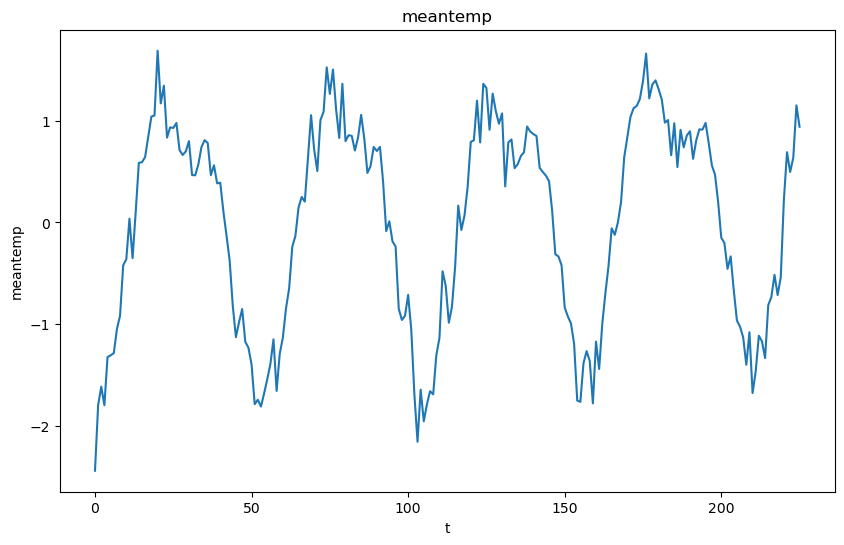

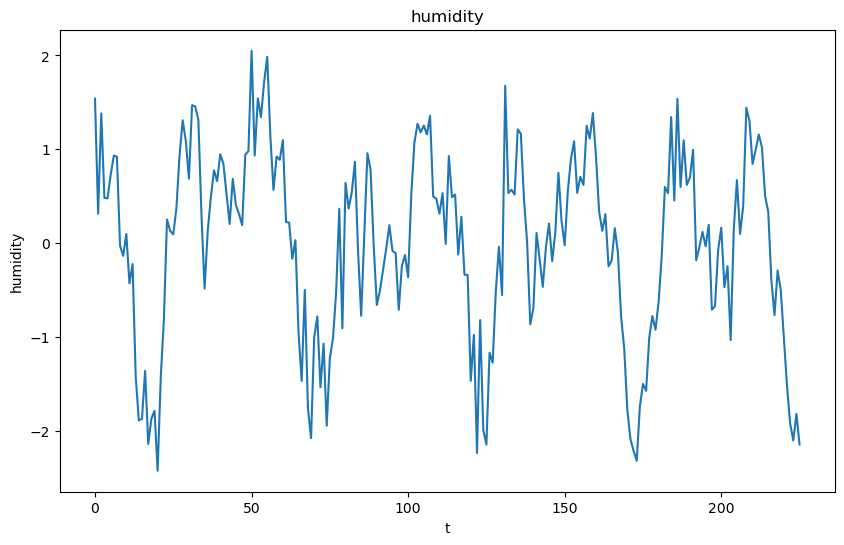

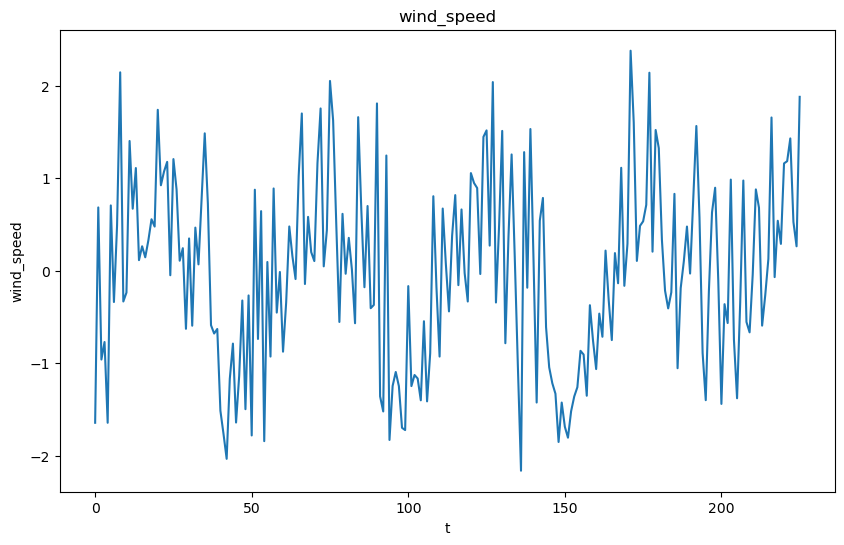

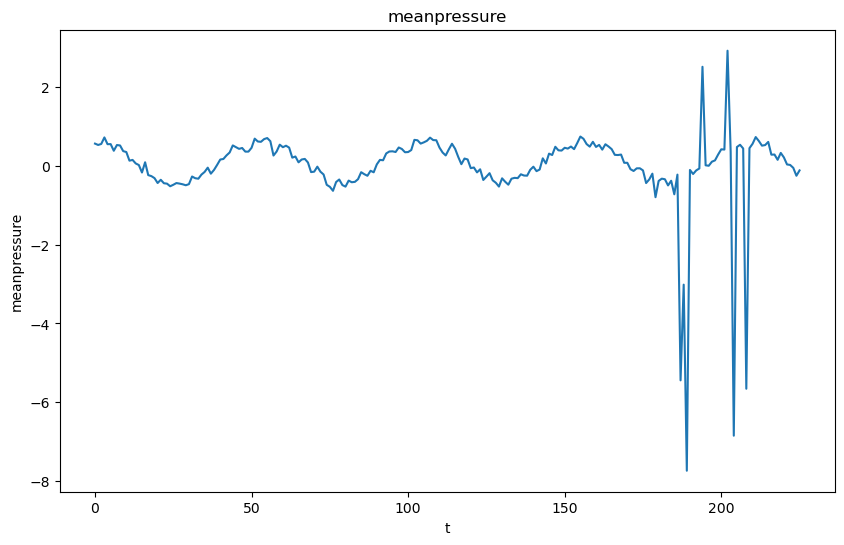

In [6]:
for col in features:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='t', y=col, data=df_weekly)
    plt.title(col)
    plt.show()

In [11]:
df_weekly.head()

,meantemp,humidity,wind_speed,meanpressure,t
0,-2.438729,1.538475,-1.643898,0.562504,0
1,-1.793775,0.312474,0.684871,0.528020,1
2,-1.613093,1.382120,-0.960034,0.554208,2
3,-1.795714,0.481038,-0.770611,0.719442,3
4,-1.321896,0.475796,-1.644107,0.548065,4


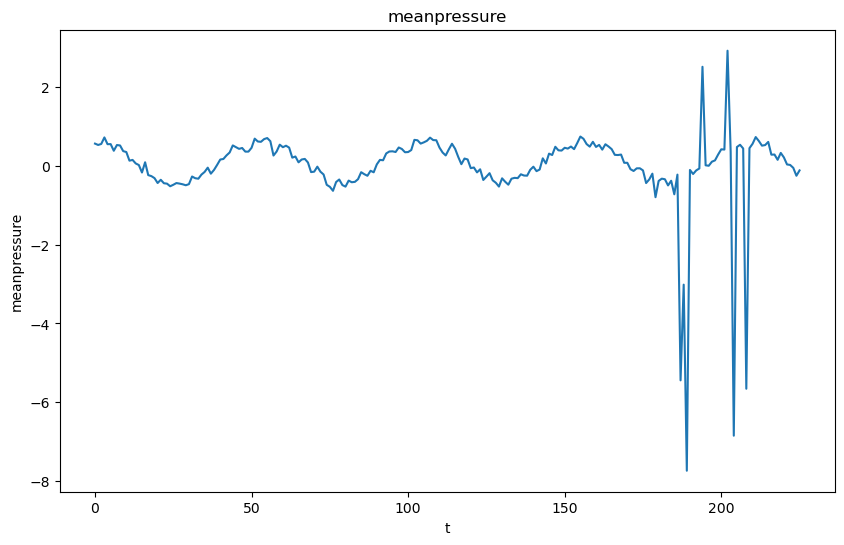

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='t', y=col, data=df_weekly)
plt.title(col)
plt.show()

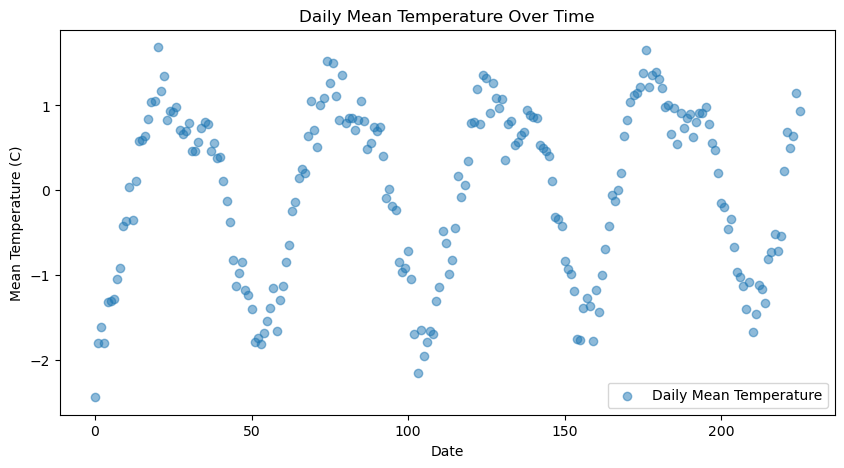

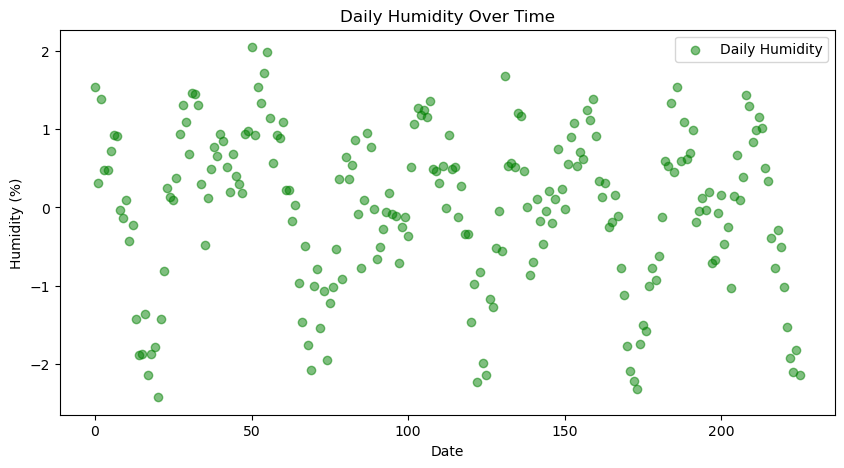

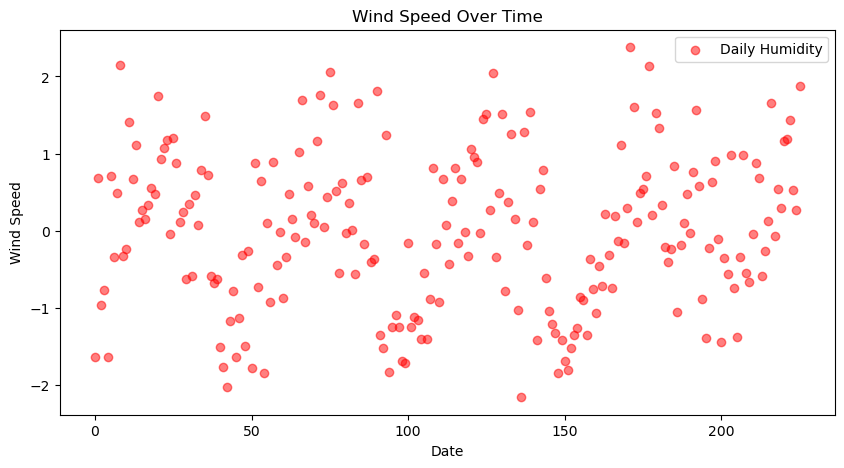

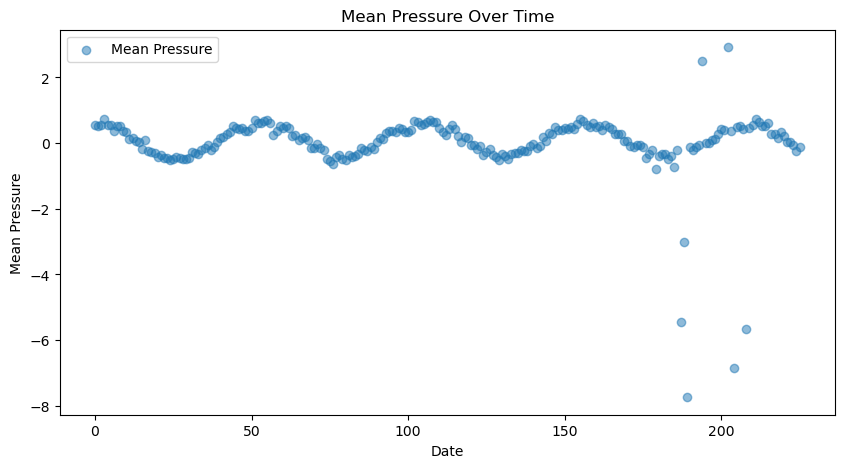

In [13]:
plt.figure(figsize=(10, 5))
plt.scatter(df_weekly.t, df_weekly['meantemp'], label='Daily Mean Temperature', alpha = 0.5)
# plt.plot(df.t, df['humidity'], label='Daily Humidity', color='green', alpha = 0.5)
plt.title('Daily Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (C)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df_weekly.t, df_weekly['humidity'], label='Daily Humidity', color='green', alpha = 0.5)
plt.title('Daily Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df_weekly.t, df_weekly['wind_speed'], label='Daily Humidity', color='red', alpha = 0.5)
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
# plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df_weekly.t, df_weekly['meanpressure'], label='Mean Pressure', alpha = 0.5)
plt.title('Mean Pressure Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Pressure')
# plt.yscale('log')
plt.legend()
plt.show()

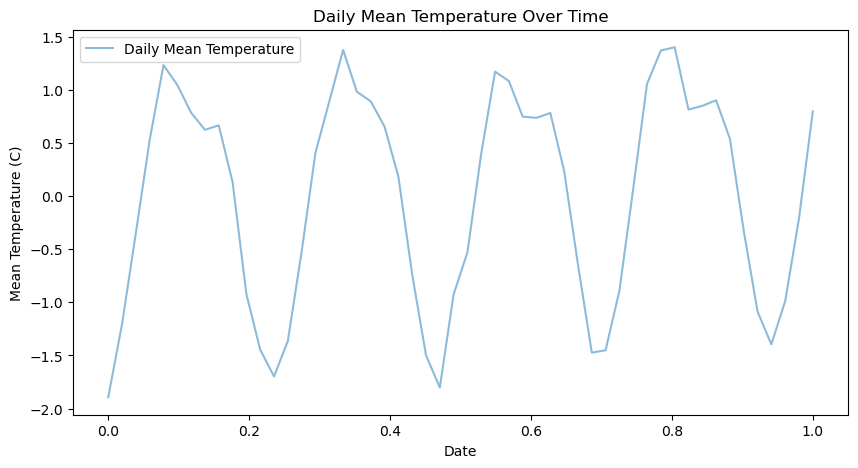

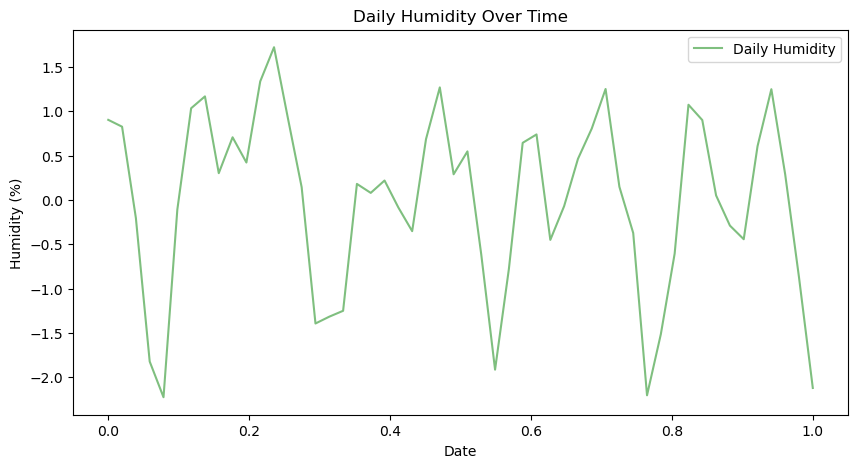

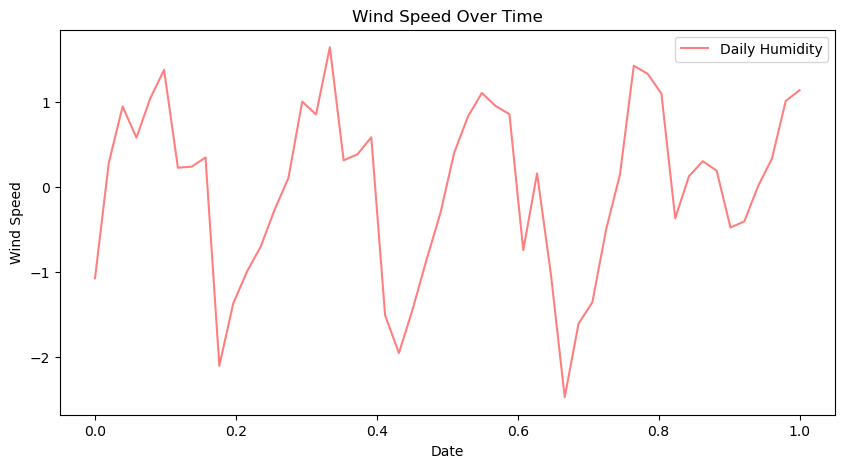

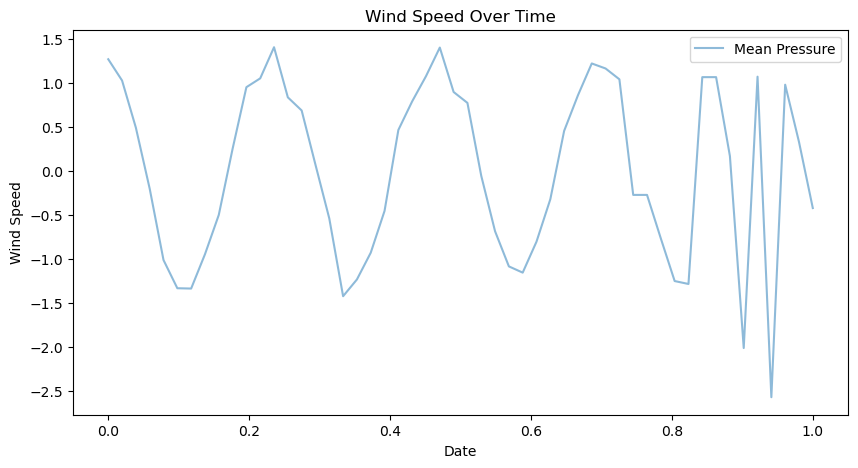

In [319]:
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.t, df_monthly['meantemp'], label='Daily Mean Temperature', alpha = 0.5)
# plt.plot(df.t, df['humidity'], label='Daily Humidity', color='green', alpha = 0.5)
plt.title('Daily Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (C)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_monthly.t, df_monthly['humidity'], label='Daily Humidity', color='green', alpha = 0.5)
plt.title('Daily Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_monthly.t, df_monthly['wind_speed'], label='Daily Humidity', color='red', alpha = 0.5)
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
# plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df_monthly.t, df_monthly['meanpressure'], label='Mean Pressure', alpha = 0.5)
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
# plt.yscale('log')
plt.legend()
plt.show()

In [289]:
# UTILS DIRECTORY
import importlib
import sys
import os
collocation2_path = os.path.abspath(os.path.join('..', 'utils'))

if collocation2_path not in sys.path:
    sys.path.append(collocation2_path)

import data_generation 
importlib.reload(data_generation)
generate_ode_data = data_generation.generate_ode_data

### `train-test split`

In [290]:
# x, y
t_train_m, t_test_m, Y_train_m, Y_test_m = train_test_split(df_monthly['t'], df_monthly[['meantemp','humidity', 'wind_speed', 'meanpressure']], test_size=0.5, random_state=42, shuffle=False)

In [291]:
Y_test_m.head()

,meantemp,humidity,wind_speed,meanpressure
26,-0.528746,0.548081,0.406572,0.769421
27,0.400874,-0.614224,0.834129,-0.121270
28,1.171273,-1.913342,1.110381,-0.798297
29,1.082701,-0.778114,0.957511,-1.227346
30,0.747450,0.644607,0.860286,-1.303606


In [292]:
import os
os.makedirs('../data/daily_climate/train', exist_ok=True)
os.makedirs('../data/daily_climate/test', exist_ok=True)

t_train_m.to_csv('../data/daily_climate/train/t_train_m.csv', index=False)
t_test_m.to_csv('../data/daily_climate/test/t_test_m.csv', index=False)
Y_train_m.to_csv('../data/daily_climate/train/Y_train_m.csv', index=False)
Y_test_m.to_csv('../data/daily_climate/test/Y_test_m.csv', index=False)

In [293]:
# x, y
t_train_w, t_test_w, Y_train_w, Y_test_w = train_test_split(df_weekly['t'], df_weekly[['meantemp','humidity', 'wind_speed', 'meanpressure']], test_size=0.5, random_state=42, shuffle=False)

In [294]:
t_train_w.to_csv('../data/daily_climate/train/t_train_w.csv', index=False)
t_test_w.to_csv('../data/daily_climate/test/t_test_w.csv', index=False)
Y_train_w.to_csv('../data/daily_climate/train/Y_train_w.csv', index=False)
Y_test_w.to_csv('../data/daily_climate/test/Y_test_w.csv', index=False)

# `df_daily` && `Chebyshev nodes`

In [14]:
df_train = pd.read_csv('../data/daily_climate/DailyDelhiClimateTrain.csv')
df_test = pd.read_csv('../data/daily_climate/DailyDelhiClimateTest.csv')

df = pd.concat([df_train, df_test])
print(df_train.shape)
print(df_test.shape)
print(df.shape)

df['date'] = pd.to_datetime(df['date']) # convert the date column to a datetime object
df.set_index('date', inplace=True) # convert the date column into the index

(1462, 5)
(114, 5)
(1576, 5)


In [15]:
# resample the data to WEEKLY averages
df.reset_index(drop=True, inplace=True)
df['t'] = df.index 
df.tail()

,meantemp,humidity,wind_speed,meanpressure,t
1571,34.500,27.500000,5.562500,998.625000,1571
1572,34.250,39.375000,6.962500,999.875000,1572
1573,32.900,40.900000,8.890000,1001.600000,1573
1574,32.875,27.500000,9.962500,1002.125000,1574
1575,32.000,27.142857,12.157143,1004.142857,1575


In [16]:
last_train_id = (df.t.tail(1).values / 2 ).astype(int)[0]
print(f"Training timepoints are from 0 to {last_train_id}")

df_train = df.loc[df.t <= last_train_id]
df_test = df.loc[df.t > last_train_id]

Training timepoints are from 0 to 787


In [201]:
def generate_chebyshev_nodes(n, start, end):
    k = np.arange(n)
    x = np.cos(np.pi * k / (n - 1))
    nodes = 0.5 * (end - start) * x + 0.5 * (start + end)
    return np.sort(nodes)

def assign_to_closest_node(days, nodes):
    indices = np.array([np.argmin(np.abs(nodes - day)) for day in days])
    return indices

In [202]:
# both train and test data
N = 200
# full range of timepoints
nodes = generate_chebyshev_nodes(N, 0, last_train_id)

# assign each timepoint the index idex of the closest node
node_indices = assign_to_closest_node(df_train.t, nodes)
# node_indices


In [203]:
def average_data(node_indices, node_indices_unique, N, data):
    averages = {}
    all_indices = np.arange(N)
    # for every node
    for i in node_indices_unique:
        # find the data points that are assigned to that node
        mask = (node_indices == i)
        # append the averge of the data points to the averages list
        averages[i] = (np.mean(data[mask]))
    
    # find the nodes that are not present in the data
    missing_nodes = np.setdiff1d(all_indices, node_indices_unique)
    
    # fill the missing nodes with the average of the closest nodes
    for i in missing_nodes:
        i_offset_upper = i
        i_offset_lower = i
        
        if i < node_indices_unique[-1]:
            while i_offset_upper not in averages.keys():
                i_offset_upper += 1
        
        if i > node_indices_unique[0]:
            while i_offset_lower not in averages.keys():
                i_offset_lower -= 1
        
        # fill the missing node with the average of the closest node
        averages[i] = np.mean([averages[i_offset_upper], averages[i_offset_lower]]) 
    
    # ensure indices are in order
    return {i: averages[i] for i in sorted(averages)}

In [204]:
# these are node indexes, but we also need their 
node_indices_order = assign_to_closest_node(df_train.t, nodes)
node_indices_unique = np.unique(node_indices_order)
data = {}

for col in df_train.drop('t', axis =1 ).columns:
    data[col] = average_data(node_indices_order, node_indices_unique, N, df_train[col])
    
data = pd.DataFrame(data)
data['t'] = nodes
data

,meantemp,humidity,wind_speed,meanpressure,t
0,10.00000,84.50000,0.000000,1015.666667,0.000000
1,8.70000,88.25000,1.490000,1016.733333,0.049034
2,8.05000,90.12500,2.235000,1017.266667,0.196125
3,7.72500,91.06250,2.607500,1017.533333,0.441235
4,7.40000,92.00000,2.980000,1017.800000,0.784303
...,...,...,...,...,...
195,20.00000,34.37500,6.712500,1009.875000,786.215697
196,19.62500,38.75000,6.256250,1011.437500,786.558765
197,19.43750,40.93750,6.028125,1012.218750,786.803875
198,19.34375,42.03125,5.914062,1012.609375,786.950966


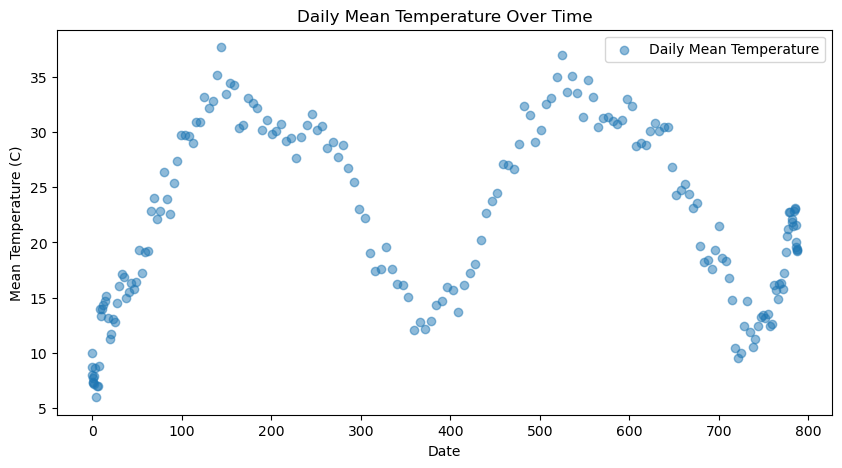

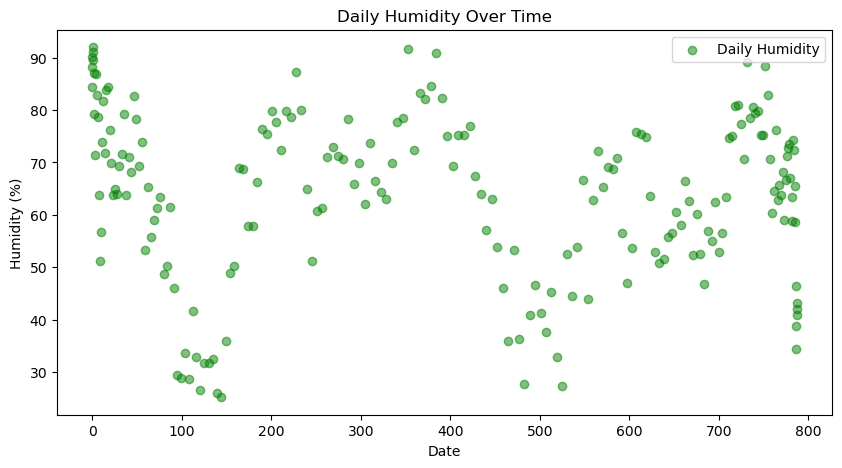

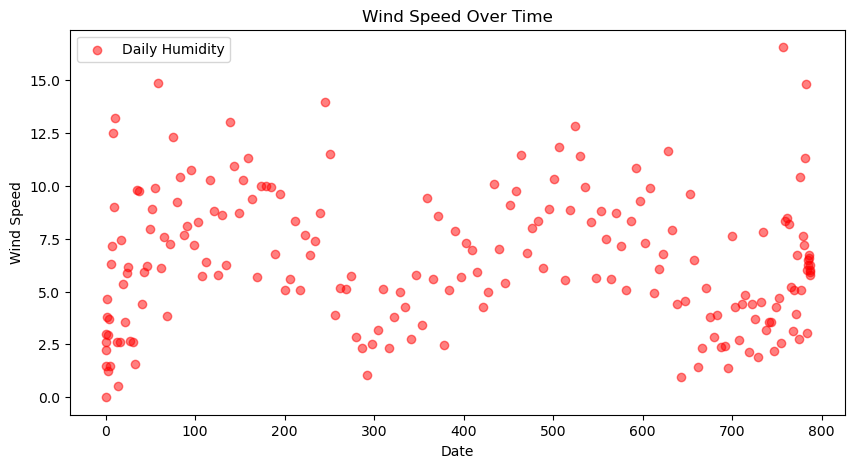

In [205]:
plt.figure(figsize=(10, 5))
plt.scatter(data.t, data['meantemp'], label='Daily Mean Temperature', alpha = 0.5)
plt.title('Daily Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (C)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(data.t, data['humidity'], label='Daily Humidity', color='green', alpha = 0.5)
plt.title('Daily Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(data.t, data['wind_speed'], label='Daily Humidity', color='red', alpha = 0.5)
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

In [206]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']  # example feature columns
scale = scaler.fit(data[features])
data[features] = scaler.transform(data[features])
df_test.loc[:, features] = scaler.transform(df_test[features])

scaler = MinMaxScaler()
scaler = scaler.fit(df[['t']])
data['t'] = scaler.transform(data[['t']])
df_test['t'] = scaler.transform(df_test[['t']])

/var/folders/2v/gfm3z1tn5fj8zss_r9hrgnv80000gn/T/ipykernel_99634/2823820463.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['t'] = scaler.transform(df_test[['t']])


In [207]:
len(df_test.index) / N

3.94

In [208]:
df_test.reset_index(drop=True, inplace=True)
df_test.loc[:, 'group'] = df_test.index // 4
df_test = df_test.groupby('group').mean()
df_test.reset_index(drop=True, inplace=True)
df_test

/var/folders/2v/gfm3z1tn5fj8zss_r9hrgnv80000gn/T/ipykernel_99634/277293878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:, 'group'] = df_test.index // 4


,meantemp,humidity,wind_speed,meanpressure,t
0,-0.469886,0.875784,0.655993,0.276990,0.501270
1,-0.423361,0.332126,-0.481201,0.593734,0.503810
2,-0.431115,0.186889,0.710381,1.055103,0.506349
3,-0.202370,0.432222,0.252537,0.678597,0.508889
4,-0.168031,0.518299,1.076261,0.653497,0.511429
...,...,...,...,...,...
192,0.792571,-1.940641,1.201838,-0.550859,0.988889
193,0.805106,-2.677763,2.585410,-0.360680,0.991429
194,1.081361,-1.937806,-0.898612,-0.836725,0.993968
195,1.458726,-2.158061,0.158814,-1.172791,0.996508


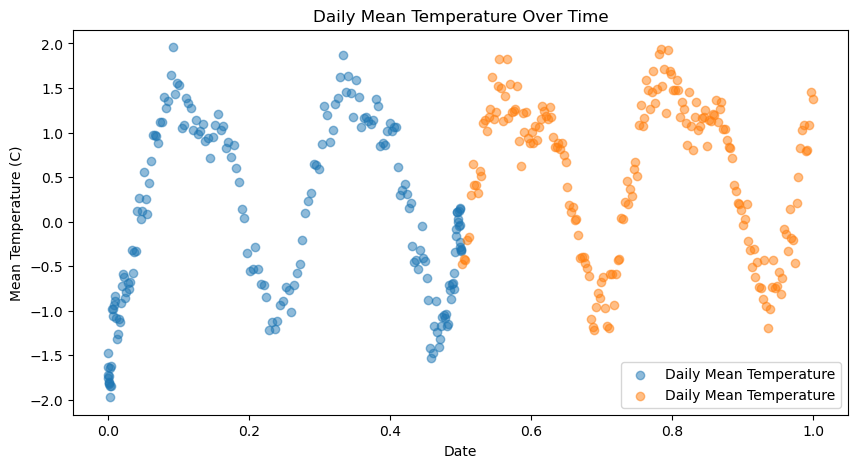

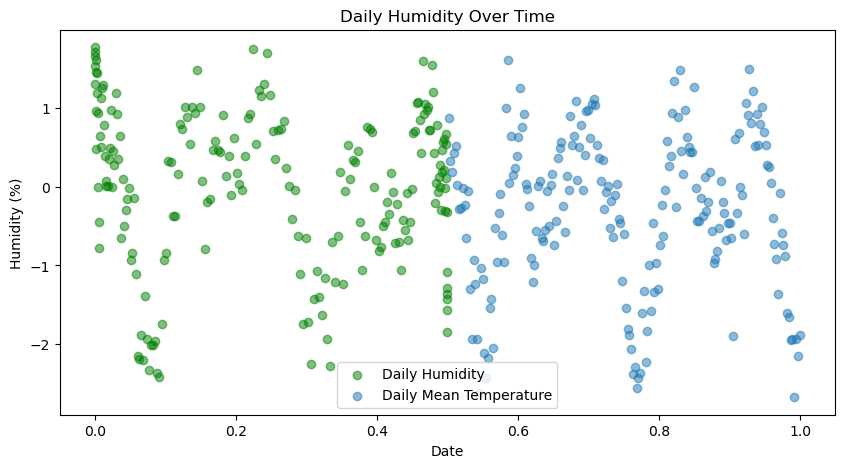

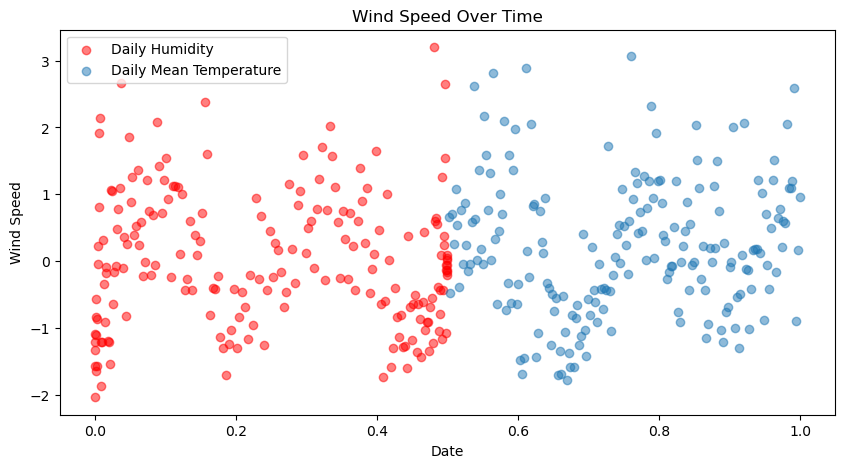

In [209]:
plt.figure(figsize=(10, 5))
plt.scatter(data.t, data['meantemp'], label='Daily Mean Temperature', alpha = 0.5)
plt.scatter(df_test.t, df_test['meantemp'], label='Daily Mean Temperature', alpha = 0.5)
plt.title('Daily Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (C)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(data.t, data['humidity'], label='Daily Humidity', color='green', alpha = 0.5)
plt.scatter(df_test.t, df_test['humidity'], label='Daily Mean Temperature', alpha = 0.5)
plt.title('Daily Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(data.t, data['wind_speed'], label='Daily Humidity', color='red', alpha = 0.5)
plt.scatter(df_test.t, df_test['wind_speed'], label='Daily Mean Temperature', alpha = 0.5)
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

In [210]:
t_train_chebyshev = data.t
Y_train_chebyshev = data.drop('t', axis = 1)

t_test_chebyshev = df_test.t
Y_test_chebyshev = df_test.drop('t', axis = 1)

In [211]:
t_train_chebyshev.to_csv('../data/daily_climate/train/t_train_chebyshev.csv', index=False)
Y_train_chebyshev.to_csv('../data/daily_climate/train/Y_train_chebyshev.csv', index=False)

t_test_chebyshev.to_csv('../data/daily_climate/test/t_test_chebyshev.csv', index=False)
Y_test_chebyshev.to_csv('../data/daily_climate/test/Y_test_chebyshev.csv', index=False)